In [1]:
import networkx as nx
import numpy as np
import os
import copy
import matplotlib.pyplot as plt

In [2]:
base_path = "/home/zihangw/EvoComm/"
output_path = os.path.join(base_path, "graphs")

In [3]:
def plot_two_deme(G_combined, deme_size, inter_edges, labels = None):
    # Generate circular layouts for each deme
    pos_left = nx.circular_layout(range(deme_size))  # Circular layout for first deme
    pos_right = nx.circular_layout(range(deme_size,2*deme_size))  # Circular layout for second deme
    
    node_colors = {}
    node_border_colors = {}
    # Shift left deme to x ≈ -1 and right deme to x ≈ 1
    for node in pos_left:
        pos_left[node][0] -= 1.5  # Shift left deme to x = -1
        node_colors[node] = "#156082"
        node_border_colors[node] = 'black'
    for node in pos_right:
        # pos_right[node][0] = -pos_right[node][0]
        pos_right[node][0] += 1.5  # Shift right deme to x = 1
        node_colors[node] = "#E97132"
        node_border_colors[node] = 'black'

    # Merge positions
    pos = {**pos_left, **pos_right}

    # Adjust inter-deme edge node positions slightly toward the center
    for (n1, n2) in inter_edges:
        node_border_colors[n1] = "#8ED973"
        node_border_colors[n2] = "#8ED973"
    #     pos[n1][0] += 1  # Shift left deme nodes slightly right
    #     pos[n2][0] -= 1  # Shift right deme nodes slightly left

    plt.figure(figsize=(8, 6))
    nodes = nx.draw_networkx_nodes(
        G_combined, pos,
        node_color=[node_colors[node] for node in G_combined.nodes],
        edgecolors=[node_border_colors[node] for node in G_combined.nodes],
        node_size=700, linewidths=2
        )
    nx.draw_networkx_edges(G_combined, pos, edge_color="black")
    nx.draw_networkx_labels(G_combined, pos, labels, font_size=10, font_color="white")
    # nx.draw(G_combined, pos, with_labels=True, node_color=list(node_colors.values()), edge_color="gray", node_size=700, font_size=10)
    plt.title("Two-Deme Graph with Inter-Deme Connections")
    plt.show()


In [4]:
# G = nx.random_regular_graph(4, 7)
# while not nx.is_connected(G):
#     G = nx.random_regular_graph(4, 7)

# G_copy = copy.deepcopy(G)
# mapping = {node: node + max(G.nodes) + 1 for node in G.nodes}
# G_copy = nx.relabel_nodes(G_copy, mapping)
# G_combined = nx.compose(G, G_copy)
# # inter_edges = [(0, 7), (0, 8)]
# inter_edges = [(0, 10), (0, 11)]
# G_combined.add_edges_from(inter_edges)


In [5]:
# nx.write_edgelist(G_combined, os.path.join(output_path,"two_deme_G_combined_14.txt"), data=False)
# nx.write_edgelist(G, os.path.join(output_path,"two_deme_G_7.txt"), data=False)
# nx.write_edgelist(G_copy, os.path.join(output_path,"two_deme_G_copy_7.txt"), data=False)

In [6]:
# G = nx.read_edgelist(os.path.join(output_path,"two_deme_14.txt"))
G_combined = nx.read_edgelist(os.path.join(output_path,"two_deme_G_combined_14.txt"), nodetype = int)
G = nx.read_edgelist(os.path.join(output_path,"two_deme_G_7.txt"), nodetype = int)
G_copy = nx.read_edgelist(os.path.join(output_path,"two_deme_G_copy_7.txt"), nodetype = int)
deme_size = 7

In [7]:
G_combined_edges = set([frozenset(edge) for edge in G_combined.edges])
G_edges = set([frozenset(edge) for edge in G.edges])
G_copy_edges = set([frozenset(edge) for edge in G_copy.edges])
inter_edges = G_combined_edges - G_edges - G_copy_edges

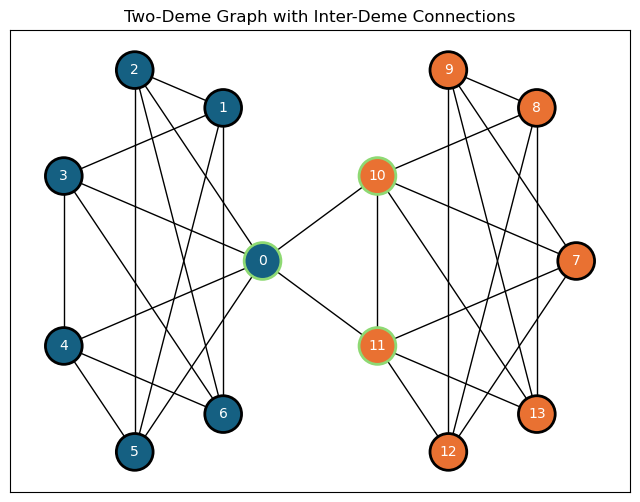

In [8]:
plot_two_deme(G_combined, deme_size, inter_edges, labels={i:i for i in range(14)})